# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [2]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,1,1,0]]).T

In [7]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
# define syn1
syn1 = 2*np.random.random((4,1)) - 1
iter = 0

#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [8]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l2_error = y - l2
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l2_delta = l2_error * nonlin(l2,True)
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn1 += np.dot(l1.T,l2_delta)
    syn0 += np.dot(l0.T,l1_delta)
     # syn1 update weights
    syn1_history.append(syn1)
    syn0_history.append(syn0)        
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l1)

Output After Training:
[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]



[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]


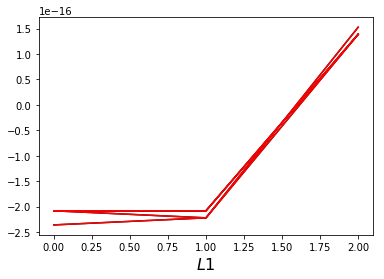

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.plot(syn0_history[1], ms=3, lw=1.5, color='red')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()